### This Project Will Make a Forecasting

Using SARIMAX metode, we will predict the test sales in day, and weekly.

### Install Package in Jupyter Notebook

conda install pandas <br>
conda install numpy <br>
conda install matplotlib <br>
conda install statsmodel <br>
conda install pmdarima <br>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import math
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore') #Ignore the warning

### Read Dataset

read a dataframe as df

In [2]:
df = pd.read_csv('D:\Imam\Belajar\Python\Data_Science\Bakery\Bakery sales.csv', sep = ',')

In [3]:
df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [4]:
# Check the type of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [5]:
# Drop column 'Unnamed: 0'
df.drop(columns='Unnamed: 0', inplace = True)

In [6]:
# Replace a string ' €' to '' in unit price
df['unit_price'] = df['unit_price'].str.replace(' €', '')

# Then, Replace a string ',' to '.' in unit price
df['unit_price'] = df['unit_price'].str.replace(',', '.')

# Replace unit price type from object to float
df['unit_price'] = df['unit_price'].astype(float)

In [7]:
#converting date to datetime
df['date'] = pd.to_datetime(df['date'])

#converting time to datetime with  format %Hour:%Minute
df['time'] = pd.to_datetime(df['time'], format='%H:%M')


In [8]:
# Print the starting date and the end date
print('Start Date:', df['date'].min(), 'End Date:', df['date'].max(), sep = '\n\n')

Start Date:

2021-01-02 00:00:00

End Date:

2022-09-30 00:00:00


In [9]:
# Check and count negatif value in column unit price and quantity
df[(df['unit_price'] <= 0) | (df['Quantity'] <= 0)].count()

date             1326
time             1326
ticket_number    1326
article          1326
Quantity         1326
unit_price       1326
dtype: int64

In [10]:
#Using the positif value
df = df[(df['unit_price'] > 0) & (df['Quantity'] > 0)]

In [11]:
#creating new column with order prices for unit
df['total'] = df['Quantity'] * df['unit_price']

#creating new column with working hours
df['hour'] = df['time'].dt.hour

#creating new column with day of week
df['day_of_week'] = df['date'].dt.dayofweek

In [12]:
# Cek max of unit price
df['unit_price'].max()

60.0

In [14]:
#units in bakery
print('Articles:',df['article'].unique(), 'Number of Articles:',df['article'].nunique(), sep = '\n\n')

Articles:

['BAGUETTE' 'PAIN AU CHOCOLAT' 'PAIN' 'TRADITIONAL BAGUETTE' 'CROISSANT'
 'BANETTE' 'BANETTINE' 'SPECIAL BREAD' 'COUPE' 'SAND JB EMMENTAL'
 'KOUIGN AMANN' 'BOULE 200G' 'BOULE 400G' 'GAL FRANGIPANE 6P' 'CAMPAGNE'
 'MOISSON' 'CAFE OU EAU' 'BRIOCHE' 'CEREAL BAGUETTE' 'SEIGLE' 'COMPLET'
 'GAL FRANGIPANE 4P' 'COOKIE' 'FICELLE' 'PAIN AUX RAISINS' 'GAL POMME 6P'
 'GAL POMME 4P' 'FINANCIER X5' 'VIK BREAD' 'DIVERS VIENNOISERIE' 'GACHE'
 'SANDWICH COMPLET' 'PAIN BANETTE' 'GRAND FAR BRETON' 'QUIM BREAD'
 'SPECIAL BREAD KG' 'GD KOUIGN AMANN' 'BOULE POLKA' 'DEMI BAGUETTE'
 'CHAUSSON AUX POMMES' 'BAGUETTE GRAINE' 'DIVERS CONFISERIE' 'SUCETTE'
 'DIVERS BOULANGERIE' 'BOISSON 33CL' 'PATES' 'FORMULE SANDWICH'
 'DIVERS SANDWICHS' 'CROISSANT AMANDES' 'PAIN CHOCO AMANDES'
 'SACHET VIENNOISERIE' 'DIVERS PATISSERIE' 'NANTAIS' 'CHOCOLAT'
 'PAIN S/SEL' 'FONDANT CHOCOLAT' 'GAL POIRE CHOCO 6P' 'GAL POIRE CHOCO 4P'
 'GALETTE 8 PERS' 'SAND JB' 'SACHET DE CROUTON' 'GRANDE SUCETTE'
 'DEMI PAIN' 'TARTELETT

In [15]:
#creating a table of daily sales
daily_sales = df.groupby('date').agg({'total':'sum'}).reset_index()

In [16]:
daily_sales.head()

,date,total
0,2021-01-02,987.85
1,2021-01-03,1015.20
2,2021-01-04,461.90
3,2021-01-05,526.10
4,2021-01-07,544.00


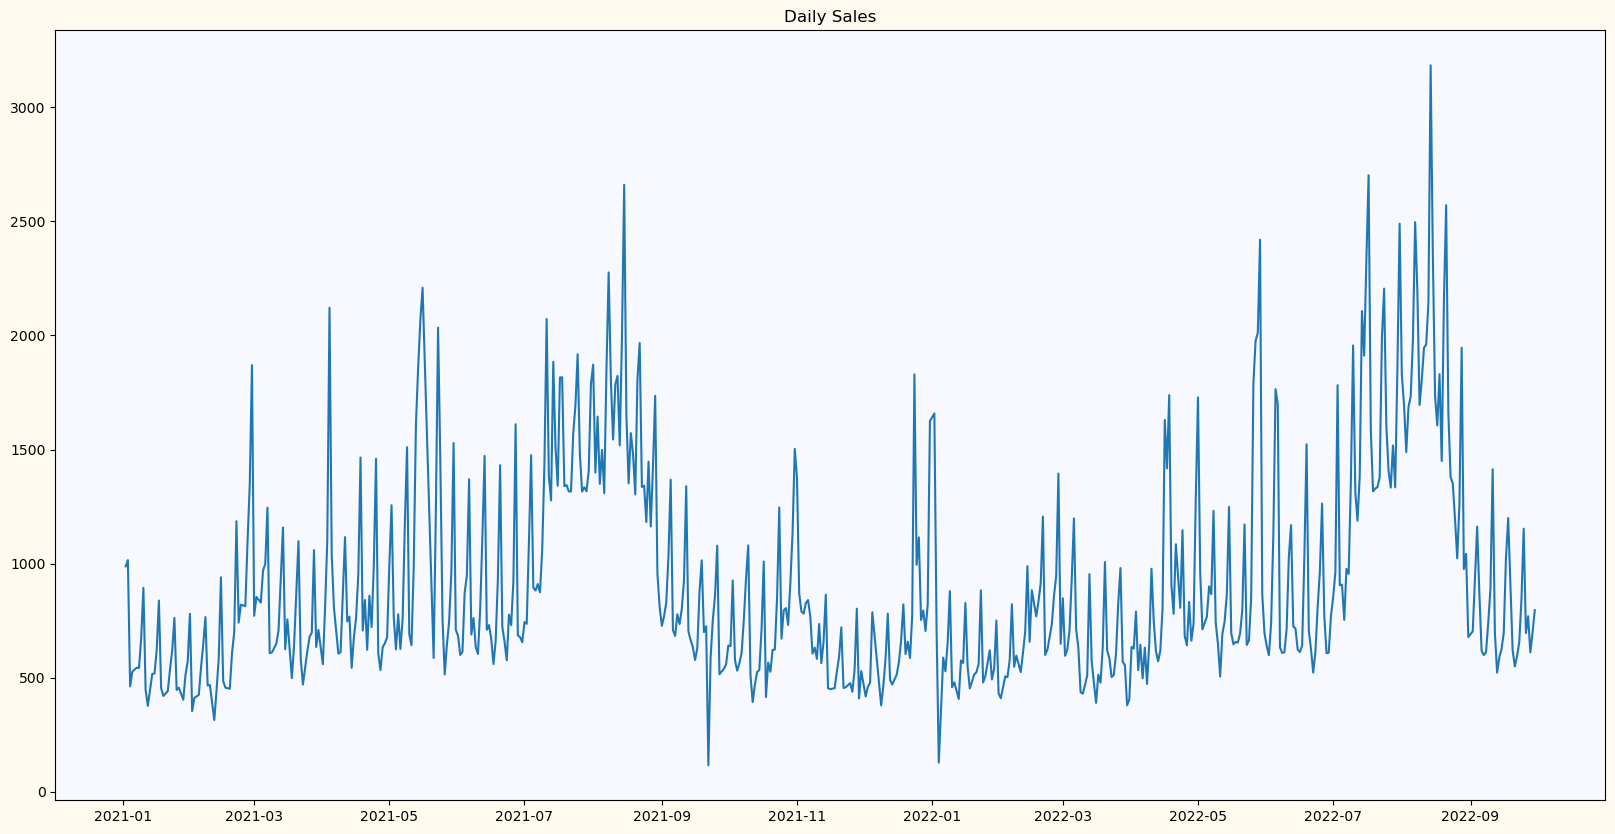

In [17]:
fig, ax = plt.subplots()
    
ax.plot(daily_sales['date'], daily_sales['total'])
ax.set_facecolor('ghostwhite')
ax.set_title('Daily Sales')

fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    
fig.set_figheight(10)  

In [18]:
#set date as index
daily_sales.set_index('date', inplace = True)

In [19]:
#creating a table of weekly sales
weekly_sales = daily_sales.resample('W').sum()

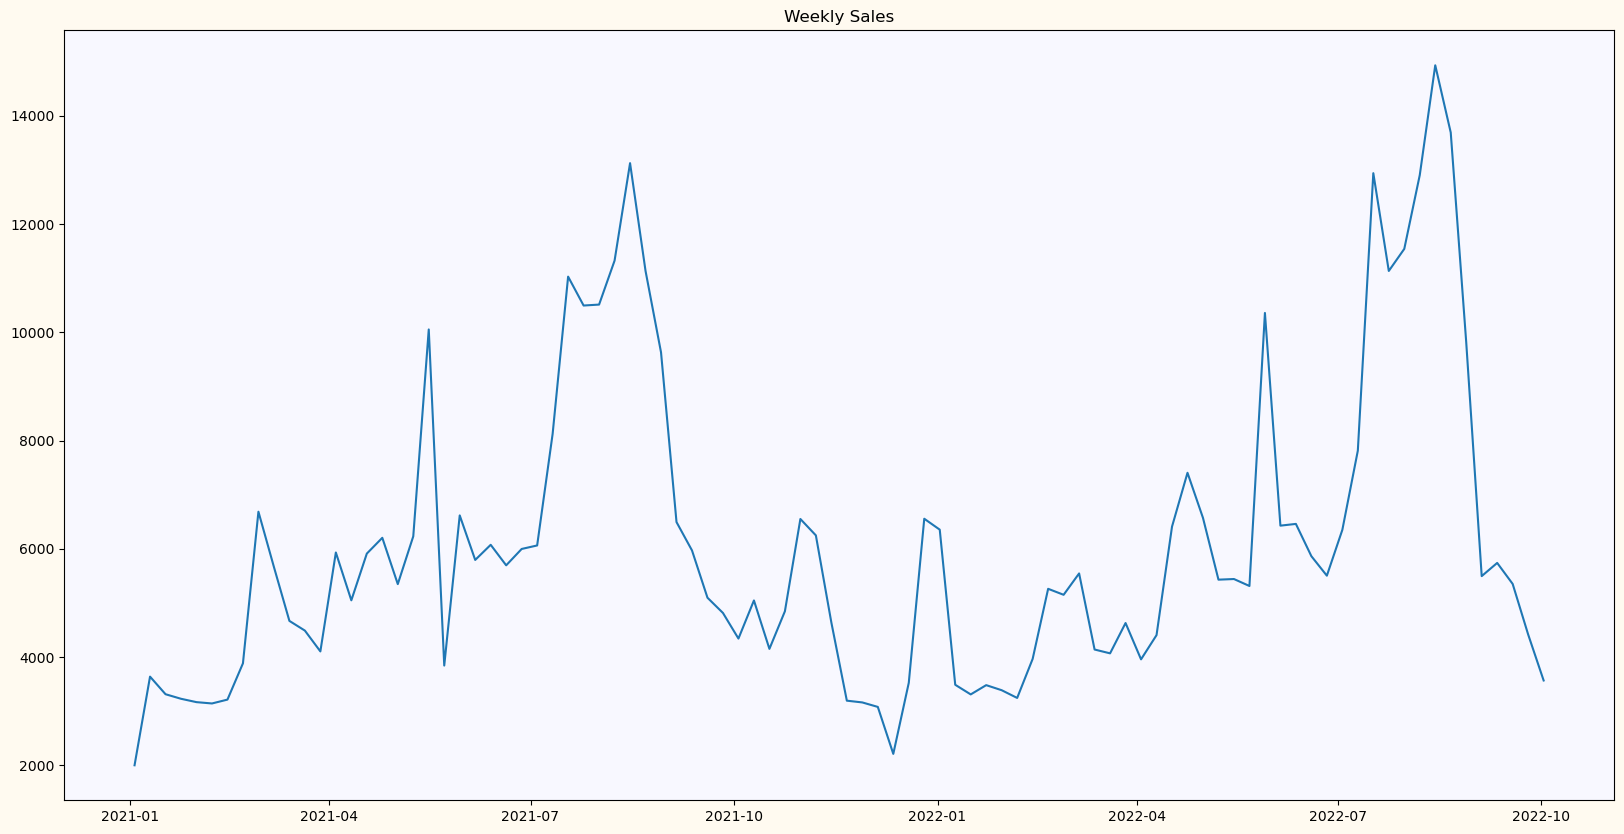

In [20]:
#creating a weekly sales plot
fig, ax = plt.subplots()
    
ax.plot(weekly_sales.index, weekly_sales['total'])
ax.set_facecolor('ghostwhite')
ax.set_title('Weekly Sales')

fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    
fig.set_figheight(10)  

In [21]:
#creating a table of prices per unit
prices = df.groupby('article').agg({'unit_price':'max'}).sort_values(by = 'unit_price', ascending = False).reset_index().head(8)

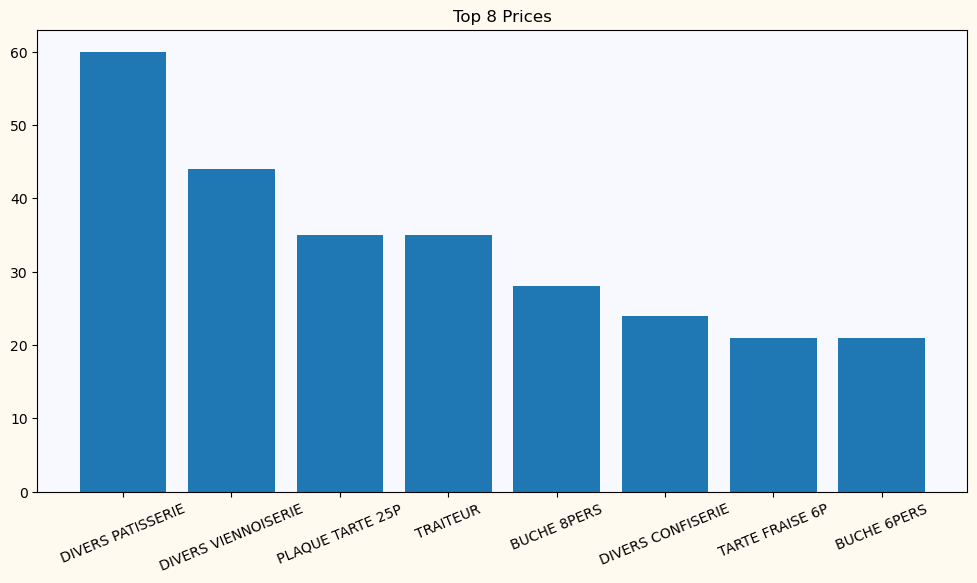

In [22]:
#creating horizontal bar chart of prices
fig, ax = plt.subplots(figsize = (12,6))
    
ax.bar(prices['article'], prices['unit_price'])
ax.set_facecolor('ghostwhite')
ax.set_title('Top 8 Prices')

fig.set_facecolor('floralwhite')
plt.xticks(prices['article'], rotation = 22.5)
plt.show()  

In [23]:
#creating a table of total quantity of sales per unit
sum_quantity = df.groupby('article').agg({'Quantity':'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index().head(8)


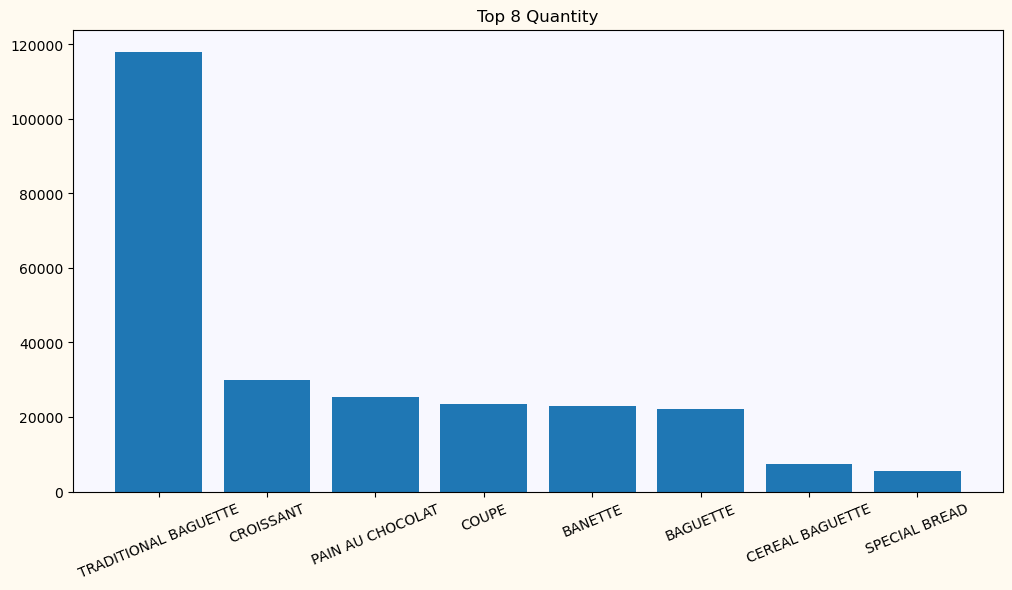

In [24]:
#creating horizontal bar chart of quantity
fig, ax = plt.subplots(figsize = (12,6))
    
ax.bar(sum_quantity['article'], sum_quantity['Quantity'])
ax.set_facecolor('ghostwhite')
ax.set_title('Top 8 Quantity')
plt.xticks(sum_quantity['article'], rotation = 22.5)
fig.set_facecolor('floralwhite')
plt.show()

In [25]:
#creating a table of total sales per hour
hours_sales = df.groupby('hour').agg({'total':'sum'}).reset_index()

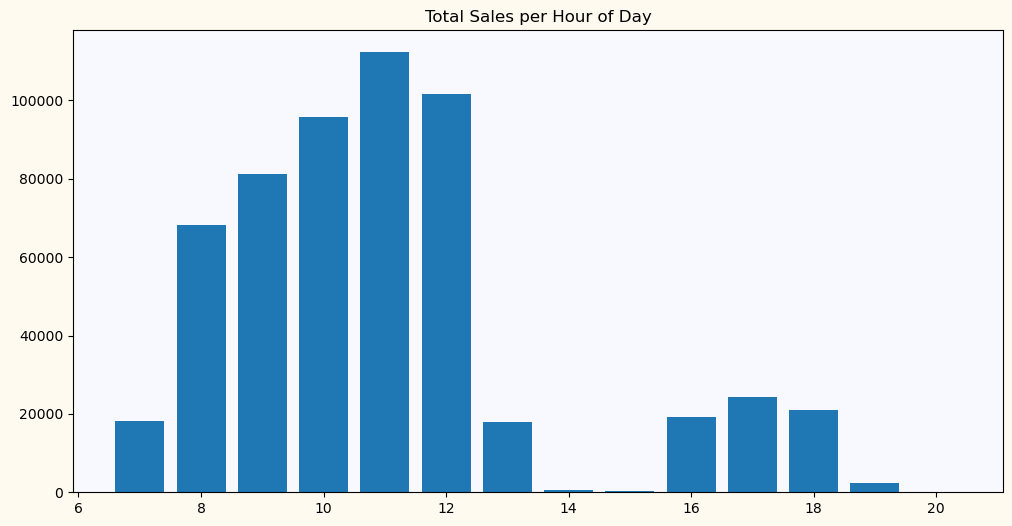

In [26]:
#creating bar chart of total sales per hour of day
fig, ax = plt.subplots(figsize = (12,6))
    
ax.bar(hours_sales['hour'], hours_sales['total'])
ax.set_facecolor('ghostwhite')
ax.set_title('Total Sales per Hour of Day')
fig.set_facecolor('floralwhite')

In [27]:
#creating a table of total sales per day of week
day_of_week_sales = df.groupby('day_of_week').agg({'total':'sum'}).reset_index()

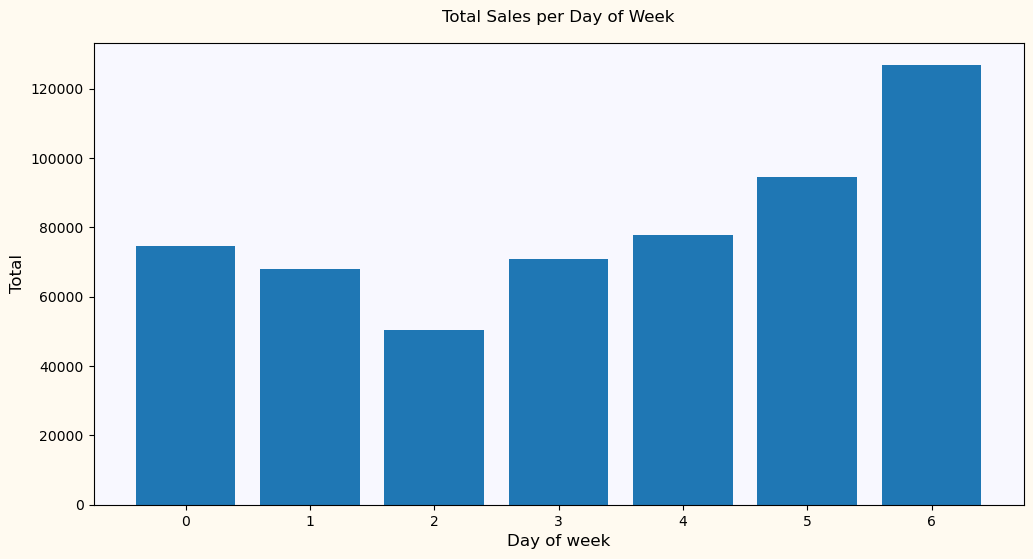

In [28]:
#creating bar chart of total sales per day
fig, ax = plt.subplots(figsize = (12,6))
ax.set_xlabel("Day of week", size = 12)
ax.set_ylabel("Total", size = 12)
ax.bar(day_of_week_sales['day_of_week'], day_of_week_sales['total'])
ax.set_facecolor('ghostwhite')
ax.set_title('Total Sales per Day of Week', size = 12, pad = 15)
fig.set_facecolor('floralwhite')
 

In [69]:
# Dickey - Fuller test
print(f'weekly = {adfuller(weekly_sales)}')

weekly = (-3.1603277923148236, 0.022399002171540994, 0, 91, {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}, 1405.898642993101)


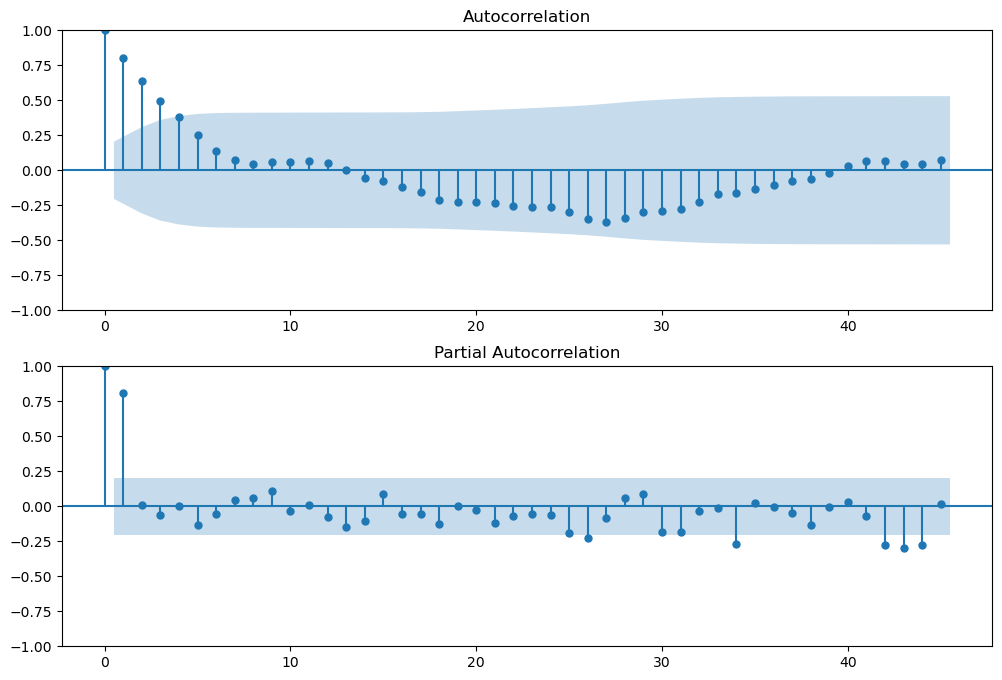

In [41]:
# Creating ACF and PACF plots
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(weekly_sales.values.squeeze(), lags=45, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(weekly_sales, lags=45, ax=ax2)

In [42]:
#train - test split
train_weekly = weekly_sales[:int(0.8*len(weekly_sales))]
test_weekly = weekly_sales[int(0.8*len(weekly_sales)):]

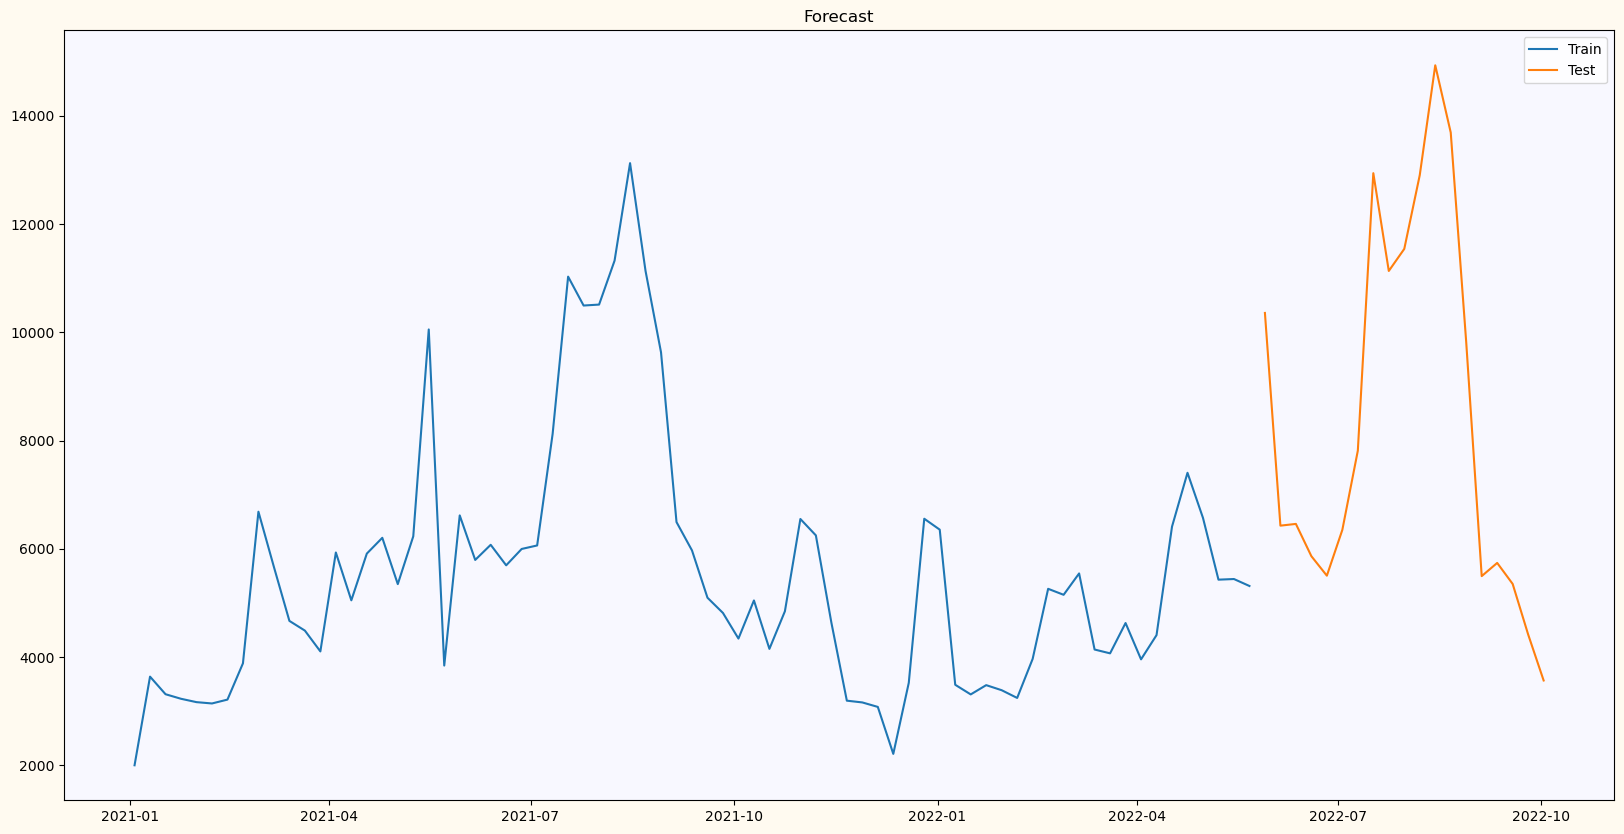

In [43]:
#creating plot of train - teat split result
fig, ax = plt.subplots()
    
ax.plot(train_weekly, label = "Train")
ax.plot(test_weekly, label = 'Test')
ax.set_facecolor('ghostwhite')
ax.set_title('Forecast')
ax.legend()

fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    
fig.set_figheight(10) 

In [44]:
#training a model
model_weekly = SARIMAX(train_weekly, order=(3,0,2), seasonal_order=(0,1,0,52))
model_weekly_fit = model_weekly.fit()
model_weekly_fit

In [45]:
#make a prediction
Prediction_weekly = pd.DataFrame(model_weekly_fit.predict(start= len(train_weekly), end=(len(train_weekly) + len(test_weekly) - 1))).set_index(test_weekly.index)

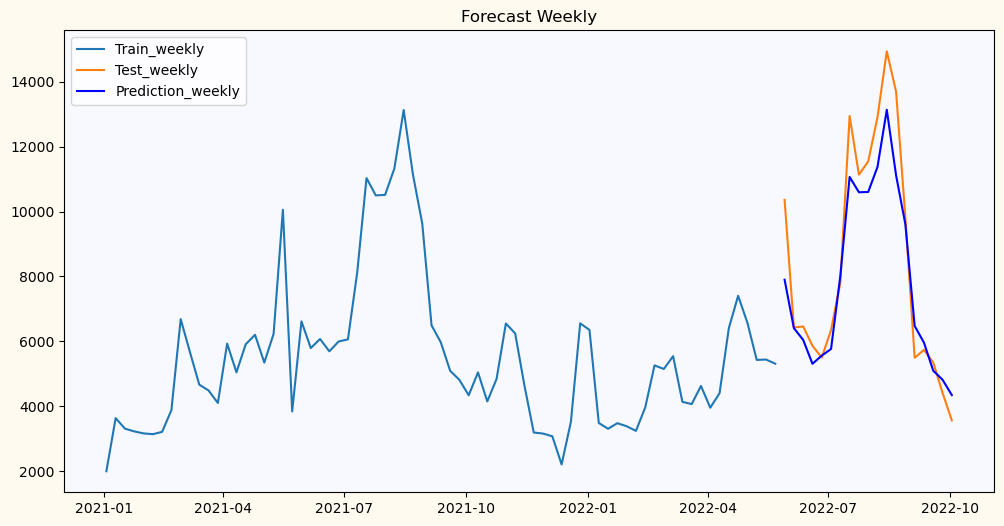

In [71]:
#creating weekly sales forecasting plot 
fig, ax = plt.subplots(figsize = (12,6))
    
ax.plot(train_weekly, label = "Train_weekly")
ax.plot(test_weekly, label = 'Test_weekly')
ax.plot(Prediction_weekly, label = 'Prediction_weekly', color="blue")
ax.set_facecolor('ghostwhite')
ax.set_title('Forecast Weekly')
ax.legend()
fig.set_facecolor('floralwhite')

plt.show()

In [47]:
rmse_weekly = math.sqrt(mean_squared_error(test_weekly, Prediction_weekly))
print(rmse_weekly)

1163.358029826649
